In [1]:
#1. Loading the NIPS papers

# Importing modules
import pandas as pd

# Read datasets/papers.csv into papers
papers =pd.read_csv('datasets/papers.csv')

# Print out the first rows of papers
papers.head(10)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


In [11]:
#2. Preparing the data for analysis

# Remove the columns
papers = papers.drop(["id",  "event_type", "pdf_name"], axis=1)



In [4]:
# Print out the first rows of papers
papers.head(10)

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1994,Using a neural net to instantiate a deformable...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1994,Plasticity-Mediated Competitive Learning,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1994,ICEG Morphology Classification using an Analog...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1994,Real-Time Control of a Tokamak Plasma Using Ne...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1994,Pulsestream Synapses with Non-Volatile Analogu...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


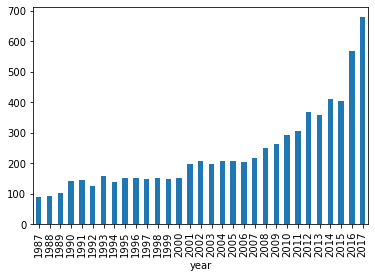

In [5]:
#3.Plotting how machine learning has evolved over time
# Group the papers by year
groups=papers.groupby("year")
counts=groups.size()
# Determine the size of each group
import matplotlib.pyplot
%matplotlib inline
counts.plot(kind='bar');

In [6]:
#4. Preprocessing the text data
# Load the regular expression library
import re

# Print the titles of the first 5 rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
papers['title_processed'].head()

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

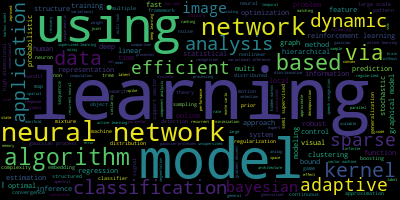

In [7]:
#5. A word cloud to visualize the preprocessed text data
# Import the wordcloud library

import wordcloud 

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud()
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

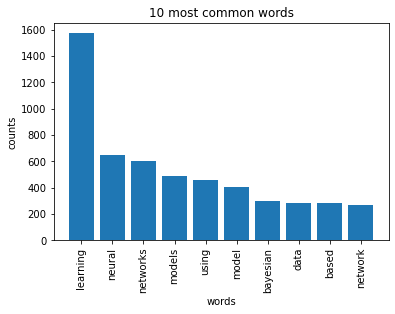

In [8]:
#6. Prepare the text for LDA analysis
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer =CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


In [9]:
#7. Analysing trends with LDA
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        


Topics found via LDA:

Topic #0:
estimation large scale policy density margin classification using covariance ranking

Topic #1:
using time memory brain generative representation statistical recognition model conditional

Topic #2:
learning online reinforcement models unsupervised multi order optimization linear algorithms

Topic #3:
based spike model feature generalized extraction reduction binary vlsi dependent

Topic #4:
processes markov hidden decision classifiers neural point network new model

Topic #5:
learning clustering optimal graphs spectral self coding algorithms analysis control

Topic #6:
learning information classification application random recognition using approach models neighbor

Topic #7:
learning regression fast supervised gradient vector stochastic support semi descent

Topic #8:
visual learning model human neural recognition adaptation machine object domain

Topic #9:
analysis data neural high network dimensional sparse component dynamical using

Topic #10:
netw

In [10]:
# Tweak the two parameters below 
number_topics = 14
number_words = 5

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
learning supervised vector semi support

Topic #1:
learning reinforcement machine model active

Topic #2:
modeling networks neural control state

Topic #3:
functions submodular map exploration human

Topic #4:
models inference graphical hierarchical object

Topic #5:
learning multi propagation kernel regression

Topic #6:
learning high dimensional regularization information

Topic #7:
model learning neural spike time

Topic #8:
learning maximum clustering tree search

Topic #9:
large dynamic scale sparse coding

Topic #10:
estimation linear methods optimization approximation

Topic #11:
neural networks network learning recurrent

Topic #12:
data matrix rank clustering structured

Topic #13:
gaussian processes process learning using
